In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [69]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

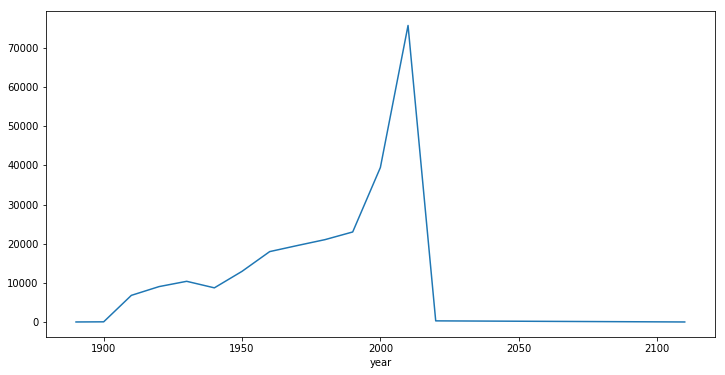

In [7]:
t = titles
g = t.groupby(t['year'] // 10 * 10).size()
g.plot(kind='line', figsize=[12,6])

### Use groupby() to plot the number of "Hamlet" films made each decade.

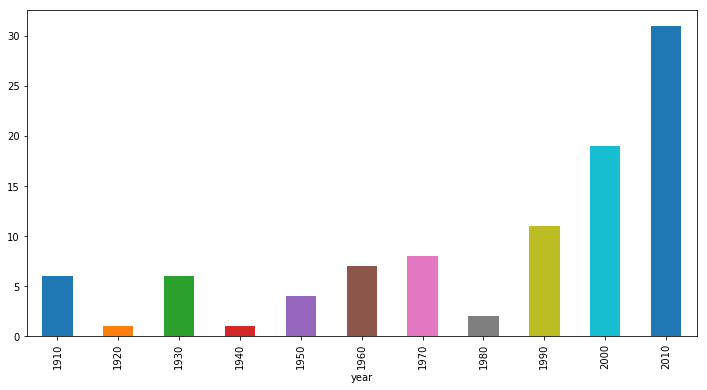

In [22]:
c = cast[cast.character == 'Hamlet']
g = c.groupby([cast.year // 10 * 10])
g.size().plot(kind='bar', figsize=[12,6])jj

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [83]:
cast[(cast.n == 1) & (cast.year.between(1950,1960))].groupby(['type']).size()


type
actor      7425
actress    3342
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [87]:
roles = cast[(cast.n.between(1,6)) & (cast.year.between(1950,1960))]
roles.groupby(['n','type']).size()


n    type   
1.0  actor      7425
     actress    3342
2.0  actor      5142
     actress    5113
3.0  actor      6229
     actress    3559
4.0  actor      6232
     actress    3197
5.0  actor      6244
     actress    2888
6.0  actor      6129
     actress    2653
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [114]:
grouped = cast[cast.title == 'The Pink Panther'].groupby('year')
grouped.size()

year
1963    21
2006    90
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [140]:
grouped = cast[(cast.name == 'Frank Oz')].groupby(['year','title'])
grouped2 = grouped.filter(lambda x: x['title'].count() > 2)
grouped2.groupby(['year','title']).size()

year  title                               
1979  The Muppet Movie                        8
1981  The Great Muppet Caper                  6
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

In [147]:
grouped = cast[(cast.name == 'Frank Oz')].groupby(['year','title'])
group = grouped.size()
group[group > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [161]:
grouped = cast[(cast.name == 'Frank Oz')].groupby(['character'])
grouping = grouped.size()
grouping[grouping > 2]

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64

In [162]:
for name, group in grouped:
    print(name)
    print(group)

Animal
                              title  year      name   type character     n
1723611      Muppet Treasure Island  1996  Frank Oz  actor    Animal  14.0
1723614          Muppets from Space  1999  Frank Oz  actor    Animal   7.0
1723634      The Great Muppet Caper  1981  Frank Oz  actor    Animal   2.0
1723641  The Muppet Christmas Carol  1992  Frank Oz  actor    Animal   5.0
1723647            The Muppet Movie  1979  Frank Oz  actor    Animal   2.0
1723655  The Muppets Take Manhattan  1984  Frank Oz  actor    Animal   2.0
Aughra, a Keeper Of Secrets (performer)
                    title  year      name   type  \
1723629  The Dark Crystal  1982  Frank Oz  actor   

                                       character    n  
1723629  Aughra, a Keeper Of Secrets (performer)  3.0  
Bert
                                        title  year      name   type  \
1723602                      Follow That Bird  1985  Frank Oz  actor   
1723625  The Adventures of Elmo in Grouchland  1999  Frank Oz 